In [1]:
import numpy as np # linear algebra - is for nerds.
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame, Series
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
#read in master dataset
df = pd.read_csv('C:/Users/jgles/dawg/Analysis/CFB_Dataset_PROD.csv')
df

,TS_ID,Team,Season,Conference,NatChamp,Playoff,ConfChamp,Heisman,Games,Win,...,Average.T.O.P,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game
0,1,Akron,2013,MAC,0,0,0,0,12,5,...,29:20:00,74,6,13,19,11,10,21,-2,-0.17
1,2,Alabama,2013,SEC,0,1,0,0,13,11,...,32:00:00,48,8,11,19,10,7,17,2,0.15
2,3,Arizona,2013,Pac-12,0,0,0,0,13,8,...,28:30:00,39,4,18,22,11,7,18,4,0.31
3,4,Arizona St.,2013,Pac-12,0,0,0,0,14,10,...,30:21:00,7,12,21,33,6,12,18,15,1.07
4,5,Arkansas,2013,SEC,0,0,0,0,12,3,...,30:26:00,111,6,8,14,12,11,23,-9,-0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,966,West Virginia,2020,Big 12,0,0,0,0,9,5,...,32:38:00,42,2,10,12,6,3,9,3,0.33
966,967,Western Ky.,2020,C-USA,0,0,0,0,11,5,...,29:23:00,83,4,5,9,10,2,12,-3,-0.27
967,968,Western Mich.,2020,MAC,0,0,0,0,6,4,...,28:15:00,98,1,2,3,4,2,6,-3,-0.50
968,969,Wisconsin,2020,Big Ten,0,0,0,0,6,3,...,36:45:00,98,4,4,8,5,6,11,-3,-0.50


## Avg Rank and Yard Diff Per Play

There are two statistics that we want to derive and track throughout time.

Through the original analysis, the <Average Rank> and **Net Yards Per Play** appeared to be powerful predictive metrics.  We will investigate here whether or not they hold predictive power throughout time.
    
We calculate those stats here.

In [3]:
#Here we can change which year we are looking at.

#df = df20
df['Avg Rank']=(df['Off.Rank']+df['Def.Rank'])/2
df['Net Yards Per Play']=df['Off.Yards.Play'] - df['Yards.Play.Allowed']
df['winpct']=df['Win'] / df['Games']
df.head()

,TS_ID,Team,Season,Conference,NatChamp,Playoff,ConfChamp,Heisman,Games,Win,...,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Avg Rank,Net Yards Per Play,winpct
0,1,Akron,2013,MAC,0,0,0,0,12,5,...,13,19,11,10,21,-2,-0.17,82.5,-0.61,0.416667
1,2,Alabama,2013,SEC,0,1,0,0,13,11,...,11,19,10,7,17,2,0.15,19.0,2.32,0.846154
2,3,Arizona,2013,Pac-12,0,0,0,0,13,8,...,18,22,11,7,18,4,0.31,46.5,0.53,0.615385
3,4,Arizona St.,2013,Pac-12,0,0,0,0,14,10,...,21,33,6,12,18,15,1.07,37.0,0.28,0.714286
4,5,Arkansas,2013,SEC,0,0,0,0,12,3,...,8,14,12,11,23,-9,-0.75,87.5,-0.56,0.250000


In [4]:
# If there are some extra columns, we drop them here that we drop here.

#df = df.drop(['Unnamed: 147',
# 'Unnamed: 148',
# 'Unnamed: 149',
# 'Unnamed: 150',
# 'Unnamed: 151',
# 'Unnamed: 152'],
#       axis = 1)

# Since we are exploring tracking certain statistics through time, we will create dataframes for each season within the dataset.

is_2013 = df['Season'] == 2013
df13 = df[is_2013]

is_2014 = df['Season'] == 2014
df14 = df[is_2014]

is_2015 = df['Season'] == 2015
df15 = df[is_2015]

is_2016 = df['Season'] == 2016
df16 = df[is_2016]

is_2017 = df['Season'] == 2017
df17 = df[is_2017]

is_2018 = df['Season'] == 2018
df18 = df[is_2018]

is_2019 = df['Season'] == 2019
df19 = df[is_2019]

is_2020 = df['Season'] == 2020
df20 = df[is_2020]

df17.head()


,TS_ID,Team,Season,Conference,NatChamp,Playoff,ConfChamp,Heisman,Games,Win,...,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Avg Rank,Net Yards Per Play,winpct
455,456,Air Force,2017,MWC,0,0,0,0,12,5,...,5,10,14,6,20,-10,-0.83,57.5,-1.29,0.416667
456,457,Akron,2017,MAC,0,0,0,0,14,7,...,19,27,6,11,17,10,0.71,112.0,-1.14,0.500000
457,458,Alabama,2017,SEC,1,1,1,0,14,13,...,19,24,7,3,10,14,1.00,15.0,2.60,0.928571
458,459,Appalachian St.,2017,Sun Belt,0,0,1,0,13,9,...,18,26,8,6,14,12,0.92,30.0,1.14,0.692308
459,460,Arizona,2017,Pac-12,0,0,0,0,13,7,...,19,25,9,13,22,3,0.23,65.0,0.98,0.538462


In [5]:
list(df)

['TS_ID',
 'Team',
 'Season',
 'Conference',
 'NatChamp',
 'Playoff',
 'ConfChamp',
 'Heisman',
 'Games',
 'Win',
 'Loss',
 'Off.Rank',
 'Off.Plays',
 'Off.Yards',
 'Off.Yards.Play',
 'Off.TDs',
 'Off.Yards.per.Game',
 'Def.Rank',
 'Def.Plays',
 'Yards.Allowed',
 'Yards.Play.Allowed',
 'Off.TDs.Allowed',
 'Total.TDs.Allowed',
 'Yards.Per.Game.Allowed',
 'First.Down.Rank',
 'First.Down.Runs',
 'First.Down.Passes',
 'First.Down.Penalties',
 'First.Downs',
 'First.Down.Def.Rank',
 'Opp.First.Down.Runs',
 'Opp.First.Down.Passes',
 'Opp.First.Down.Penalties',
 'Opp.First.Downs',
 'X4th.Down.Rank',
 'X4th.Attempts',
 'X4th.Conversions',
 'X4th.Percent',
 'X4rd.Down.Def.Rank',
 'Opp.4th.Conversion',
 'Opp.4th.Attempt',
 'Opponent.4th.Percent',
 'Kickoff.Return.Rank',
 'Kickoffs.Returned',
 'Kickoff.Return.Yards',
 'Kickoff.Return.Touchdowns',
 'Avg.Yard.per.Kickoff.Return',
 'Passing.Off.Rank',
 'Pass.Attempts',
 'Pass.Completions',
 'Interceptions.Thrown.x',
 'Pass.Yards',
 'Pass.Yards.Attem

In [6]:
data = df[['TS_ID',
 'Team',
 'Season',
 'Conference',
 'NatChamp',
 'Playoff',
 'ConfChamp',
 'Heisman',
 'Games',
 'Win',
 'Loss',
 'Off.Rank',
 'Off.Plays',
 'Off.Yards',
 'Off.Yards.Play',
 'Off.TDs',
 'Off.Yards.per.Game',
 'Def.Rank',
 'Def.Plays',
 'Yards.Allowed',
 'Yards.Play.Allowed',
 'Off.TDs.Allowed',
 'Total.TDs.Allowed',
 'Yards.Per.Game.Allowed',
 'First.Down.Rank',
 'First.Down.Runs',
 'First.Down.Passes',
 'First.Down.Penalties',
 'First.Downs',
 'First.Down.Def.Rank',
 'Opp.First.Down.Runs',
 'Opp.First.Down.Passes',
 'Opp.First.Down.Penalties',
 'Opp.First.Downs',
 'X4th.Down.Rank',
 'X4th.Attempts',
 'X4th.Conversions',
 'X4th.Percent',
 'X4rd.Down.Def.Rank',
 'Opp.4th.Conversion',
 'Opp.4th.Attempt',
 'Opponent.4th.Percent',
 'Kickoff.Return.Rank',
 'Kickoffs.Returned',
 'Kickoff.Return.Yards',
 'Kickoff.Return.Touchdowns',
 'Avg.Yard.per.Kickoff.Return',
 'Passing.Off.Rank',
 'Pass.Attempts',
 'Pass.Completions',
 'Interceptions.Thrown.x',
 'Pass.Yards',
 'Pass.Yards.Attempt',
 'Yards.Completion',
 'Pass.Touchdowns',
 'Pass.Yards.Per.Game',
 'Pass.Def.Rank',
 'Opp.Completions.Allowed',
 'Opp.Pass.Attempts',
 'Opp.Pass.Yds.Allowed',
 'Opp.Pass.TDs.Allowed',
 'Yards.Attempt.Allowed',
 'Yards.Completion.Allowed',
 'Pass.Yards.Per.Game.Allowed',
 'Penalty.Rank',
 'Penalties',
 'Penalty.Yards',
 'Penalty.Yards.Per.Game',
 'Punt.Return.Rank',
 'Punt.Returns',
 'Net.Punt.Return.Yards',
 'Punt.Return.Touchdowns',
 'Avg.Yards.Per.Punt.Return',
 'Punt.Return.Def.Rank',
 'Opp.Punt.Returns',
 'Opp.Net.Punt.Return.Yards',
 'Opp.Punt.Return.Touchdowns.Allowed',
 'Avg.Yards.Allowed.per.Punt.Return',
 'Redzone.Off.Rank',
 'Redzone.Attempts',
 'Redzone.Rush.TD',
 'Redzone.Pass.TD',
 'Redzone.Field.Goals.Made',
 'Redzone.Scores',
 'Redzone.Points',
 'Redzone.Def.Rank',
 'Opp.Redzone.Attempts',
 'Opp.Redzone.Rush.TD.Allowed',
 'Opp.Redzone.Pass.Touchdowns.Allowed',
 'Opp.Redzone.Field.Goals.Made',
 'Opp.Redzone.Scores',
 'Redzone.Points.Allowed',
 'Rushing.Off.Rank',
 'Rush.Attempts',
 'Rush.Yds',
 'Yards.Rush',
 'Rushing.TD',
 'Rushing.Yards.per.Game',
 'Rushing.Def.Rank',
 'Opp.Rush.Attempts',
 'Opp.Rush.Yards.Alloweed',
 'Yds.Rush.Allowed',
 'Opp.Rush.Touchdowns.Allowed',
 'Rush.Yards.Per.Game.Allowed',
 'Sack.Rank',
 'Sacks',
 'Sack.Yards',
 'Average.Sacks.per.Game',
 'Scoring.Def.Rank',
 'Touchdowns.Allowed',
 'Opponent.Extra.Points',
 'X2.Point.Conversions.Allowed',
 'Opp.Deflected.Extra.Points',
 'Opp.Feild.Goals.Made',
 'Opp.Safety',
 'Points.Allowed',
 'Avg.Points.per.Game.Allowed',
 'Scoring.Off.Rank',
 'Touchdowns',
 'PAT',
 'X2.Point.Conversions',
 'Defensive.Points',
 'Feild.Goals',
 'Safety',
 'Total.Points',
 'Points.Per.Game',
 'Tackle.for.Loss.Rank',
 'Solo.Tackle.For.Loss',
 'Assist.Tackle.For.Loss',
 'Tackle.for.Loss.Yards',
 'Total.Tackle.For.Loss',
 'Tackle.For.Loss.Per.Game',
 'X3rd.Down.Rank',
 'X3rd.Attempts',
 'X3rd.Conversions',
 'X3rd.Percent',
 'X3rd.Down.Def.Rank',
 'Opp.3rd.Conversion',
 'Opp.3rd.Attempt',
 'Opponent.3rd.Percent',
 'Time.of.Possession.Rank',
 'Average.T.O.P',
 'Turnover.Rank',
 'Fumbles.Recovered',
 'Opponents.Intercepted',
 'Turnovers.Gain',
 'Fumbles.Lost',
 'Interceptions.Thrown.y',
 'Turnovers.Lost',
 'Turnover.Margin',
 'Avg.Turnover.Margin.per.Game',
 'Avg Rank',
 'Net Yards Per Play',
 'winpct']
]
correlation=data.corr(method='pearson')
correlation

,TS_ID,Season,NatChamp,Playoff,ConfChamp,Heisman,Games,Win,Loss,Off.Rank,...,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Avg Rank,Net Yards Per Play,winpct
TS_ID,1.000000,0.991600,-0.017057,-0.023437,-0.020009,-0.010503,-0.464044,-0.158352,-0.134079,0.015608,...,-0.315651,-0.390300,-0.291197,-0.304723,-0.392516,-0.023212,-0.015099,0.041523,-0.024047,-0.024795
Season,0.991600,1.000000,-0.005203,-0.010538,-0.008875,-0.005203,-0.454284,-0.150414,-0.136881,0.012947,...,-0.310156,-0.388467,-0.288115,-0.314774,-0.398119,-0.017482,-0.009825,0.038239,-0.018545,-0.019901
NatChamp,-0.017057,-0.005203,1.000000,0.493724,0.304164,0.495842,0.104140,0.210984,-0.183978,-0.124368,...,0.153424,0.109076,-0.004518,-0.027502,-0.022829,0.106513,0.093902,-0.177092,0.201465,0.180891
Playoff,-0.023437,-0.010538,0.493724,1.000000,0.511149,0.429903,0.154024,0.350582,-0.319122,-0.221211,...,0.149326,0.134591,-0.012667,-0.087550,-0.071681,0.164269,0.153823,-0.294740,0.324750,0.320393
ConfChamp,-0.020009,-0.008875,0.304164,0.511149,1.000000,0.221288,0.176121,0.448046,-0.422457,-0.280642,...,0.221099,0.203238,-0.049102,-0.124582,-0.119989,0.256919,0.240405,-0.359544,0.383655,0.431563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turnover.Margin,-0.023212,-0.017482,0.106513,0.164269,0.256919,0.094377,0.177655,0.578778,-0.580885,-0.246905,...,0.611334,0.672128,-0.352611,-0.533215,-0.596004,1.000000,0.981580,-0.418238,0.457194,0.599935
Avg.Turnover.Margin.per.Game,-0.015099,-0.009825,0.093902,0.153823,0.240405,0.081840,0.159837,0.562373,-0.573436,-0.250965,...,0.596490,0.655834,-0.346890,-0.528556,-0.589269,0.981580,1.000000,-0.420972,0.461004,0.606174
Avg Rank,0.041523,0.038239,-0.177092,-0.294740,-0.359544,-0.132520,-0.241881,-0.785139,0.787373,0.709498,...,-0.411262,-0.344005,-0.001418,0.247460,0.181064,-0.418238,-0.420972,1.000000,-0.886595,-0.829892
Net Yards Per Play,-0.024047,-0.018545,0.201465,0.324750,0.383655,0.200834,0.278957,0.799135,-0.778300,-0.643628,...,0.433803,0.377147,-0.016291,-0.254834,-0.196734,0.457194,0.461004,-0.886595,1.000000,0.835205


In [7]:
# Lets get a better view of the list
pd.set_option('display.max_rows', 200)

In [8]:
correlation.drop(correlation.columns.difference(['winpct']),1, inplace=True)
correlation.sort_values(by=['winpct'], ascending=False)

,winpct
winpct,1.000000
Win,0.945728
Net Yards Per Play,0.835205
Points.Per.Game,0.750031
Total.Points,0.722688
PAT,0.720022
Touchdowns,0.707089
Off.TDs,0.690997
Redzone.Scores,0.685794
Redzone.Attempts,0.652923


C:\Users\jgles\miniconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


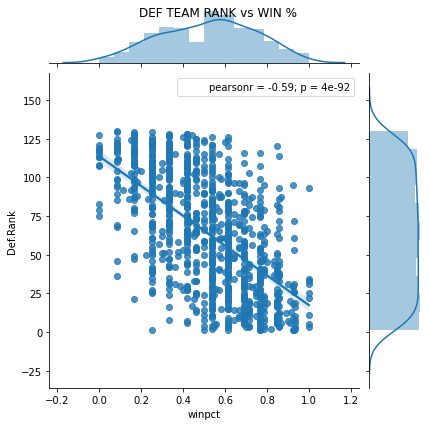

In [9]:
g=sns.jointplot('winpct','Def.Rank',df,kind='reg')
g.annotate(stats.pearsonr)
g.fig.suptitle('DEF TEAM RANK vs WIN %')
plt.show()

C:\Users\jgles\miniconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


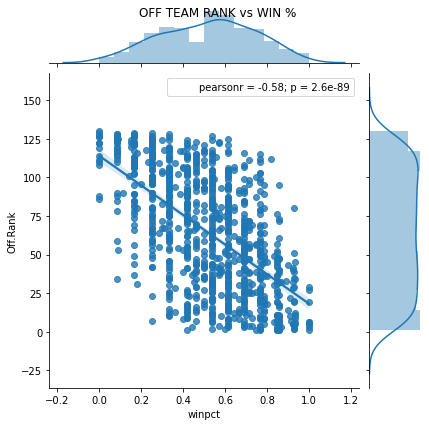

In [10]:
#Regression graph for Offensive Rank and Defensive Rank Vs Win Pct with correlation

#Results show a stronger correlation between Defensive Rank and Win Pct

g=sns.jointplot('winpct','Off.Rank',df, kind='reg')
g.annotate(stats.pearsonr)
g.fig.suptitle('OFF TEAM RANK vs WIN %')
plt.show()

C:\Users\jgles\miniconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


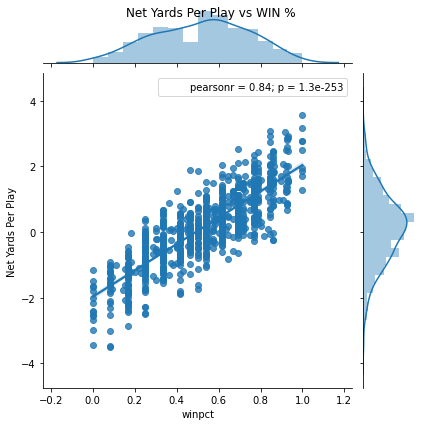

In [11]:
#Regression graph for NYPP Vs Win Pct with correlation

#Results show a stronger correlation between NYPP and Winpct

g=sns.jointplot('winpct','Net Yards Per Play',df, kind='reg')
g.annotate(stats.pearsonr)
g.fig.suptitle('Net Yards Per Play vs WIN %')
plt.show()

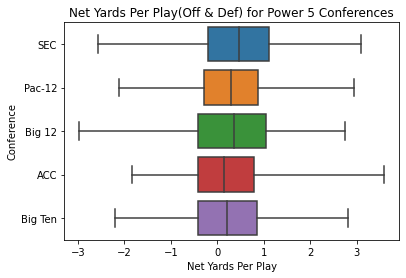

,TS_ID,Team,Season,winpct,Net Yards Per Play,NatChamp,Playoff,ConfChamp
25,26,Florida St.,2013,1.000000,3.58,1,1,1
605,606,Clemson,2018,1.000000,3.16,1,1,1
715,716,Alabama,2019,0.846154,3.08,0,0,0
859,860,BYU,2020,0.916667,3.04,0,0,0
69,70,Oregon,2013,0.846154,2.93,0,0,0
734,735,Clemson,2019,0.933333,2.92,0,1,1
586,587,Alabama,2018,0.933333,2.87,0,1,1
155,156,Marshall,2014,0.928571,2.86,0,0,1
790,791,Ohio St.,2019,0.928571,2.81,0,1,1
845,846,Alabama,2020,1.000000,2.79,1,1,1


In [13]:
filter=df['Conference']== 'ACC'
filter2=df['Conference']== 'SEC'
filter3=df['Conference']== 'Big 12'
filter4=df['Conference']== 'Big Ten' 
filter5=df['Conference']== 'Pac-12'
dfn=df.where(filter | filter2 | filter3 | filter4 | filter5)
sns.boxplot(dfn['Net Yards Per Play'], dfn['Conference'], whis=np.inf)
plt.title('Net Yards Per Play(Off & Def) for Power 5 Conferences')
plt.show()
df[['TS_ID' , 'Team', 'Season', 'winpct', 'Net Yards Per Play', 'NatChamp', 'Playoff', 'ConfChamp']].sort_values('Net Yards Per Play', ascending = False)[0:25]

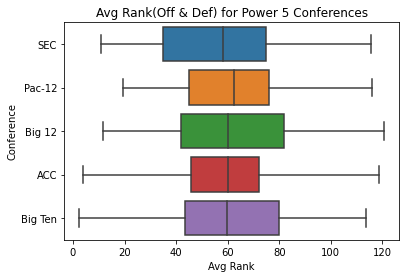

,Team,Season,winpct,Off.Rank,Def.Rank,Avg Rank,NatChamp,Playoff,ConfChamp
790,Ohio St.,2019,0.928571,4,1,2.5,0,1,1
605,Clemson,2018,1.000000,3,5,4.0,1,1,1
25,Florida St.,2013,1.000000,6,3,4.5,1,1,1
734,Clemson,2019,0.933333,5,6,5.5,0,1,1
864,Clemson,2020,0.909091,10,6,8.0,0,1,1
531,Ohio St.,2017,0.857143,7,9,8.0,0,0,1
384,Louisville,2016,0.692308,3,14,8.5,0,0,0
162,Michigan St.,2014,0.846154,11,8,9.5,0,0,0
859,BYU,2020,0.916667,7,13,10.0,0,0,0
358,Clemson,2016,0.933333,12,8,10.0,1,1,1


In [14]:
dfn=df.where(filter | filter2 | filter3 | filter4 | filter5)
sns.boxplot(dfn['Avg Rank'], dfn['Conference'], whis=np.inf)
plt.title('Avg Rank(Off & Def) for Power 5 Conferences')
plt.show()
df[['Team', 'Season', 'winpct', 'Off.Rank', 'Def.Rank','Avg Rank', 'NatChamp', 'Playoff', 'ConfChamp']].sort_values('Avg Rank', ascending = True)[0:25]

In [15]:
# Bottom 10 in Avg Rank
df[['Team', 'Season','Off.Rank','Def.Rank','Avg Rank']].sort_values('Avg Rank')[-10:]

,Team,Season,Off.Rank,Def.Rank,Avg Rank
132,Eastern Mich.,2014,121,118,119.5
323,UCF,2015,127,113,120.0
261,Kansas,2015,114,127,120.5
433,Texas St.,2016,126,117,121.5
956,Utah St.,2020,123,120,121.5
188,SMU,2014,124,119,121.5
544,San Jose St.,2017,120,124,122.0
897,Massachusetts,2020,127,118,122.5
673,San Jose St.,2018,122,125,123.5
768,Massachusetts,2019,126,130,128.0


In [16]:
# Bottom 10 in NYPP. THEY STINK COACH!

# Bottom 10 in Avg Rank
df[['Team', 'Season', 'Win', 'Loss','Net Yards Per Play']].sort_values('Net Yards Per Play', ascending=False)[-10:]

,Team,Season,Win,Loss,Net Yards Per Play
261,Kansas,2015,0,12,-2.53
188,SMU,2014,1,11,-2.54
959,Vanderbilt,2020,0,9,-2.57
48,Miami (OH),2013,0,12,-2.67
844,Akron,2020,1,5,-2.87
886,Kansas,2020,0,9,-2.97
22,FIU,2013,1,11,-3.02
897,Massachusetts,2020,0,4,-3.45
696,UConn,2018,1,11,-3.47
768,Massachusetts,2019,1,11,-3.49


In [17]:
#df19[['TS_ID' , 'Team', 'Season', 'winpct', 'Net Yards Per Play', 'NatChamp', 'Playoff', 'ConfChamp']].sort_values('Net Yards Per Play', ascending = False)[0:25]
df[['TS_ID' , 'Team', 'Season', 'winpct', 'Net Yards Per Play', 'NatChamp', 'Playoff', 'ConfChamp', 'Heisman']].sort_values('Heisman', ascending = False)[0:25]

,TS_ID,Team,Season,winpct,Net Yards Per Play,NatChamp,Playoff,ConfChamp,Heisman
845,846,Alabama,2020,1.000000,2.79,1,1,1,1
661,662,Oklahoma,2018,0.857143,2.47,0,1,1,1
384,385,Louisville,2016,0.692308,2.52,0,0,0,1
225,226,Alabama,2015,0.933333,1.59,1,1,1,1
25,26,Florida St.,2013,1.000000,3.58,1,1,1,1
532,533,Oklahoma,2017,0.857143,2.45,0,1,1,1
765,766,LSU,2019,1.000000,2.78,1,1,1,1
181,182,Oregon,2014,0.866667,1.82,0,1,0,1
645,646,Minnesota,2018,0.538462,-0.26,0,0,0,0
644,645,Middle Tenn.,2018,0.571429,0.07,0,0,0,0


In [18]:
#Kick out the Df for visualization in Tableau
df.to_csv("All_TimeTableauCFB.csv")